# Principal component analysis

In [1]:
# Importing required libs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Creating dataset to work with: let us have a collection of m points, each of which is a vector of length n
m = 100 # number of points
n = 10 # length of each vector
X = np.random.rand(m, n) * 10

In [3]:
# Finding the eigen values and vectors of X^T * X
eigVals, eigVecs = np.linalg.eig(np.matmul(X.T, X))

In [4]:
# Sort eigen values and vectors
ascendingInds = np.argsort(eigVals)
descendingInds = ascendingInds[::-1]

In [5]:
# Rearranging eigVals and eigVecs based on the above findings
eigVals = eigVals[descendingInds]
eigVecs = eigVecs[:,descendingInds]

In [6]:
# Choosing number of components for PCA
l = 5 # number of principle components
D = eigVecs[:, :l]

In [7]:
# Encoding
coded = D.T @ X.T

In [8]:
# Decoding
reconst = D @ coded
print(reconst.shape)

(10, 100)


In [9]:
# norm and reconstruction error
print(np.linalg.norm(X), np.linalg.norm(X.T-reconst))

187.010489594 58.1617191644


## Everything written in single function

In [10]:
def encodePCA(X, noOfComps):
    
    # Finding the eigen values and vectors of X^T * X
    eigVals, eigVecs = np.linalg.eig(np.matmul(X.T, X))
    
    # Sort eigen values and vectors
    ascendingInds = np.argsort(eigVals)
    descendingInds = ascendingInds[::-1]
    
    # Rearranging eigVals and eigVecs based on the above findings
    eigVals = eigVals[descendingInds]
    eigVecs = eigVecs[:,descendingInds]
    
    D = eigVecs[:, :noOfComps]
    
    # Encoding
    coded = D.T @ X.T
    
    return coded, D
    
def decodePCA(c, D):
    
    # Decoding
    return D @ c

## Using the functions above

In [11]:
c, D = encodePCA(X, 5)
print(c.shape, D.shape)
XReconstructed = decodePCA(c, D)

(5, 100) (10, 5)


## Doing above in a loop for various no of comps and plotting results

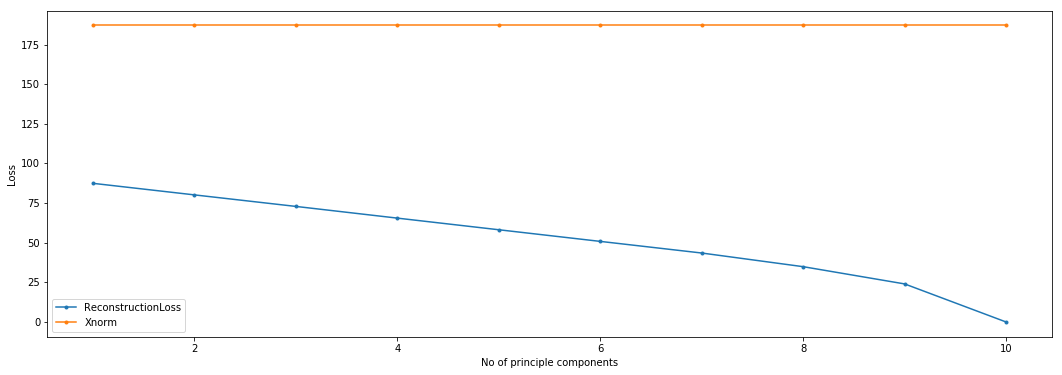

In [12]:
reconsError = []
Xnorm = []
for i in range(1, 11):
    c, D = encodePCA(X, i)
    XReconstructed = decodePCA(c, D)
    reconsError.append(np.linalg.norm(X.T-XReconstructed))
    Xnorm.append(np.linalg.norm(X))
    
plt.figure(figsize=(18,6))
plt.plot(range(1, 11), reconsError, '.-', label='ReconstructionLoss')
plt.plot(range(1, 11), Xnorm, '.-', label='Xnorm')
plt.xlabel('No of principle components')
plt.ylabel('Loss')
plt.legend();plt.show()